In [ ]:
import pandas as pd

df = pd.read_csv('dataset_largeclass.csv')
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,LargeClass
0,coba.py,django-2.2,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django-2.2,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django-2.2,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django-2.2,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django-2.2,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


# **PREPROCESSING**

In [ ]:
df['project'] = df['project'].str.replace(r'-.*$', '', regex=True)

In [ ]:
df

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,LargeClass
0,coba.py,django,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22800,benchmarks\benchmarks\go_benchmark_functions\g...,scipy,1.9.0,226.0,69.0,64.0,1.0,82.0,79.0,24.0,...,1424.857,4.358,6209.378,344.965,0.474952,31.0,2.0,1.0,3.0,1
22801,benchmarks\benchmarks\go_benchmark_functions\_...,scipy,1.9.0,72.0,29.0,27.0,1.0,37.0,7.0,0.0,...,2.000,0.500,1.000,0.056,0.000667,0.0,0.0,0.0,0.0,0
22802,benchmarks\benchmarks\linprog_benchmark_files\...,scipy,1.9.0,20.0,3.0,1.0,1.0,13.0,5.0,0.0,...,2.000,0.500,1.000,0.056,0.000667,0.0,0.0,0.0,0.0,0
22803,benchmarks\benchmarks\tests\test_go_benchmark_...,scipy,1.9.0,76.0,44.0,45.0,12.0,3.0,16.0,26.0,...,112.588,1.800,202.658,11.259,0.037529,12.0,2.0,0.0,16.0,0


In [ ]:
df['LargeClass'].unique()

array([0, 1])

In [ ]:
df.isnull().sum()

,0
file,0
project,0
version,0
loc,0
lloc,0
sloc,0
comments,0
multi,0
blank,0
cyclo,0


# **SPLIT DATA**

In [ ]:
from sklearn.model_selection import train_test_split

meta = df[["file", "version", "project"]]

X = df.drop(columns=["file", "version", "project","LargeClass"])
y = df["LargeClass"]

X_train, X_test, y_train, y_test, meta_train, meta_test = train_test_split(
    X, y, meta, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
print("Fitur final:", X_train.columns.tolist())

Fitur final: ['lloc', 'sloc', 'comments', 'multi', 'blank', 'cyclo', 'wmc', 'η1', 'η2', 'N1', 'N2', 'η', 'N', 'N_hat', 'V', 'D', 'E', 'T', 'B', 'cbo', 'lcom']


# **FEATURE SCALING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ModifiedZScoreScaler(BaseEstimator, TransformerMixin):
    """
    Modified Z-score scaling (median & MAD).
    Cocok untuk data skewed / outlier-heavy.
    """
    def fit(self, X, y=None):
        self.medians_ = X.median()
        self.mads_ = (np.abs(X - self.medians_)).median()
        self.mads_ = self.mads_.replace(0, 1e-9)
        return self

    def transform(self, X):
        return 0.6745 * (X - self.medians_) / self.mads_

In [ ]:
# before scaling
print("\n=== Sebelum Scaling ===")
print(X_train.head())

# Scaling
scaler = ModifiedZScoreScaler()
X_train_scaled = scaler.fit_transform(X_train)

# after scaling
print("\n=== Setelah Scaling ===")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


=== Sebelum Scaling ===
        lloc   sloc  comments  multi  blank  cyclo    wmc    η1     η2     N1  \
21208  167.0  147.0      24.0  224.0   88.0   35.0   35.0  15.0  190.0  171.0   
17196  511.0  636.0      13.0    0.0  159.0  129.0  129.0  12.0  115.0  123.0   
16488   30.0   28.0       9.0   23.0   16.0   12.0   12.0   5.0   10.0    6.0   
8470    37.0  131.0       0.0    0.0   14.0    7.0    7.0   0.0    0.0    0.0   
8756    71.0   90.0       1.0    4.0   17.0   17.0   17.0   0.0    0.0    0.0   

       ...      η      N     N_hat         V       D          E         T  \
21208  ...  205.0  495.0  1496.876  3801.343  12.789  48617.172  2700.954   
17196  ...  127.0  329.0   830.251  2299.277  10.748  24712.232  1372.902   
16488  ...   15.0   17.0    44.829    66.417   2.750    182.647    10.147   
8470   ...    0.0    0.0     0.000     0.000   0.000      0.000     0.000   
8756   ...    0.0    0.0     0.000     0.000   0.000      0.000     0.000   

              B   cbo  lc

# **FEATURE SELECTION**

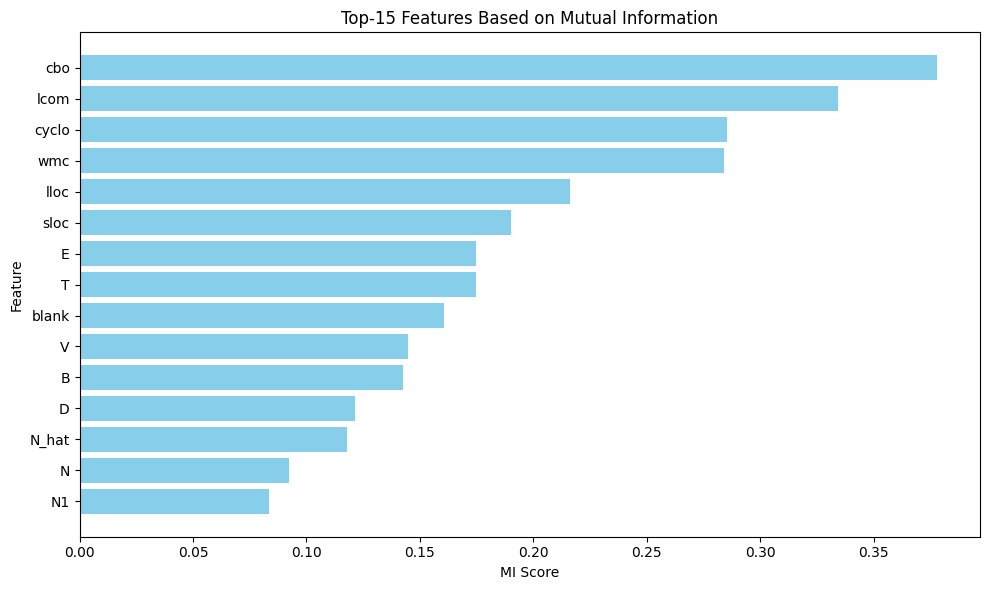

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def select_topk_features_MI(X, y, k):
    """
    Feature selection menggunakan Mutual Information.
    Mengambil k fitur teratas berdasarkan skor MI.
    """
    scores = mutual_info_classif(X, y, random_state=42)
    mi_series = pd.Series(scores, index=X.columns)
    selected = mi_series.nlargest(k).index.tolist()
    return selected, scores

selected_features, scores = select_topk_features_MI(X_train, y_train, k=15)

mi_df = pd.DataFrame({
    "feature": X_train.columns,
    "mi_score": scores
}).sort_values("mi_score", ascending=True)

mi_selected_df = mi_df[mi_df["feature"].isin(selected_features)]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(mi_selected_df["feature"], mi_selected_df["mi_score"], color='skyblue')
plt.title("Top-15 Features Based on Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **MODELING MACHINE LEARNING**

**RANDOM FOREST**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np

n_estimators_list = [100, 200, 300]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

fold_metrics = {}
mean_acc_results = []
mean_mcc_results = []

for n in n_estimators_list:

    print("\n\n======================")
    print(f"   n_estimators = {n}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    fold_metrics[n] = {
        "acc": [],
        "mcc": [],
        "train_time": [],
        "pred_time": []
    }

    # Cross Validatio for each hyperparameter tuning
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # Random Forest model
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=7,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        # Train time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Predict time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        fold_metrics[n]["acc"].append(acc)
        fold_metrics[n]["mcc"].append(mcc)
        fold_metrics[n]["train_time"].append(train_time)
        fold_metrics[n]["pred_time"].append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_results.append(np.mean(acc_all))
    mean_mcc_results.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for n_estimators =", n)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")



   n_estimators = 100

===== Fold 1 ====
Selected features: ['cbo', 'lcom', 'cyclo', 'wmc', 'lloc', 'sloc', 'E', 'T', 'blank', 'V', 'B', 'D', 'N_hat', 'N', 'η']
Accuracy: 0.90408
MCC: 0.81914
Training Time:  2.31655 sec
Prediksi Time:  0.05802 sec

===== Fold 2 ====
Selected features: ['cbo', 'lcom', 'cyclo', 'wmc', 'lloc', 'sloc', 'blank', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'N', 'η2']
Accuracy: 0.90765
MCC: 0.82574
Training Time:  1.09919 sec
Prediksi Time:  0.04807 sec

===== Fold 3 ====
Selected features: ['cbo', 'lcom', 'cyclo', 'wmc', 'lloc', 'sloc', 'blank', 'E', 'T', 'V', 'B', 'D', 'N_hat', 'N', 'N2']
Accuracy: 0.90792
MCC: 0.82482
Training Time:  1.10552 sec
Prediksi Time:  0.04711 sec

===== Fold 4 ====
Selected features: ['cbo', 'lcom', 'cyclo', 'wmc', 'lloc', 'sloc', 'blank', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'η2']
Accuracy: 0.90984
MCC: 0.82827
Training Time:  1.09281 sec
Prediksi Time:  0.04739 sec

===== Fold 5 ====
Selected features: ['cbo', 'lcom', 'cyclo', 'wmc',

**Visualitation of Evaluation Result of Each n_estimator**

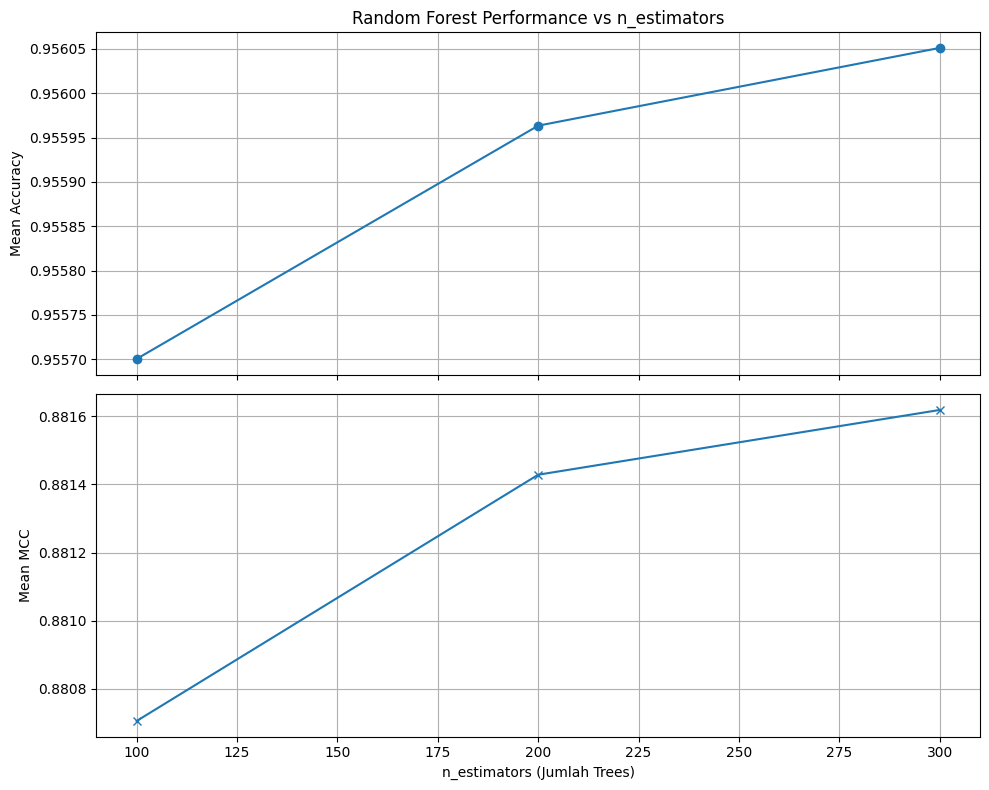

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_estimators_list, mean_acc_results, marker='o')
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_title('Random Forest Performance vs n_estimators')
axes[0].grid(True)

#  MCC
axes[1].plot(n_estimators_list, mean_mcc_results, marker='x')
axes[1].set_xlabel('n_estimators (Jumlah Trees)')
axes[1].set_ylabel('Mean MCC')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## **KNN**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np

n_neighbors_list = [1, 3, 5, 7, 9, 11]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_acc_knn = []
mean_mcc_knn = []
mean_train_knn = []
mean_pred_knn = []

for k in n_neighbors_list:

    print("\n\n======================")
    print(f"        K = {k}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        model = KNeighborsClassifier(
            n_neighbors=k,
            weights='distance',
            p=2
        )

        # Training time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Prediction time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} =====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time: {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_knn.append(np.mean(acc_all))
    mean_mcc_knn.append(np.mean(mcc_all))
    mean_train_knn.append(np.mean(train_time_all))
    mean_pred_knn.append(np.mean(predict_time_all))

    print("\n>>> RESULT for K =", k)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")



        K = 1

===== Fold 1 =====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.97122
MCC: 0.92039
Training Time:  0.02751 sec
Prediction Time: 0.05343 sec

===== Fold 2 =====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.96465
MCC: 0.90185
Training Time:  0.02790 sec
Prediction Time: 0.05454 sec

===== Fold 3 =====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.97205
MCC: 0.92268
Training Time:  0.03078 sec
Prediction Time: 0.05338 sec

===== Fold 4 =====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.96876
MCC: 0.91312
Training Time:  0.03011 sec
Prediction Time: 0.05397 sec

===== Fold 5 =====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T'

**Visualitation of Evaluation Result of n_neighbors**

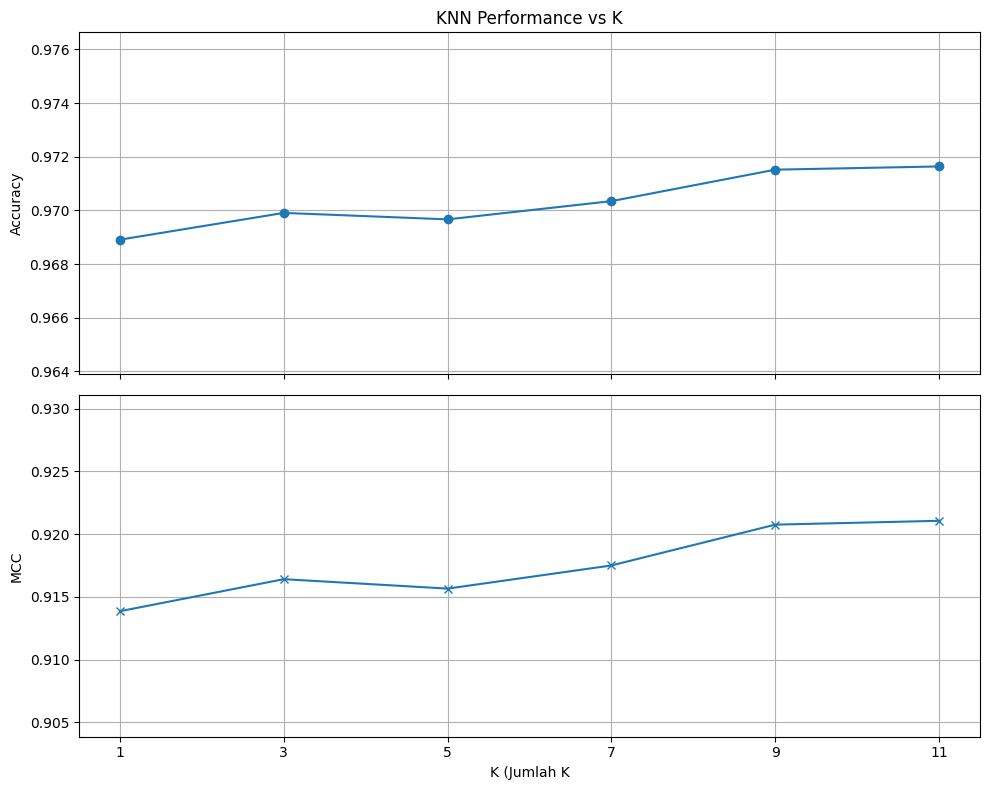

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_neighbors_list, mean_acc_knn, marker='o')
axes[0].set_ylabel("Accuracy")
axes[0].set_title("KNN Performance vs K")
axes[0].grid(True)
axes[0].set_ylim(min(mean_acc_knn)-0.005, max(mean_acc_knn)+0.005)

#  MCC
axes[1].plot(n_neighbors_list, mean_mcc_knn, marker='x')
axes[1].set_xlabel("K (Jumlah K")
axes[1].set_ylabel("MCC")
axes[1].grid(True)
axes[1].set_ylim(min(mean_mcc_knn)-0.01, max(mean_mcc_knn)+0.01)

# Set X-ticks sesuai angka K
plt.xticks(n_neighbors_list)

plt.tight_layout()
plt.show()

# **LOGISTIC REGRESION**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef

C_list = [0.001, 0.01, 0.1, 1, 10, 100]

mean_acc_lr = []
mean_mcc_lr = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("  LOGISTIC REGRESSION EVALUATION")
print("===============================\n")

for C in C_list:

    print("\n\n=====================")
    print(f"        C = {C}")
    print("=====================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    # Cross Validation for each hyperparameter tuning
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # Logistic Regression model
        model = LogisticRegression(C=C, max_iter=3000, solver='lbfgs')

        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time:{pred_time:.5f} sec")

        fold_counter += 1

    mean_acc_lr.append(np.mean(acc_all))
    mean_mcc_lr.append(np.mean(mcc_all))

    print("\n>>> RESULT for C =", C)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")


  LOGISTIC REGRESSION EVALUATION



        C = 0.001

===== Fold 1 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95012
MCC: 0.85963
Training Time:  1.00100 sec
Prediction Time:0.00202 sec

===== Fold 2 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.94108
MCC: 0.83389
Training Time:  0.47935 sec
Prediction Time:0.00175 sec

===== Fold 3 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.94738
MCC: 0.85152
Training Time:  1.04572 sec
Prediction Time:0.00638 sec

===== Fold 4 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.95122
MCC: 0.86259
Training Time:  0.89587 sec
Prediction Time:0.00431 sec

===== Fold 5 ====
Selected features: ['lloc', 'sloc'

**Visualitation of Evaluation Result of C**

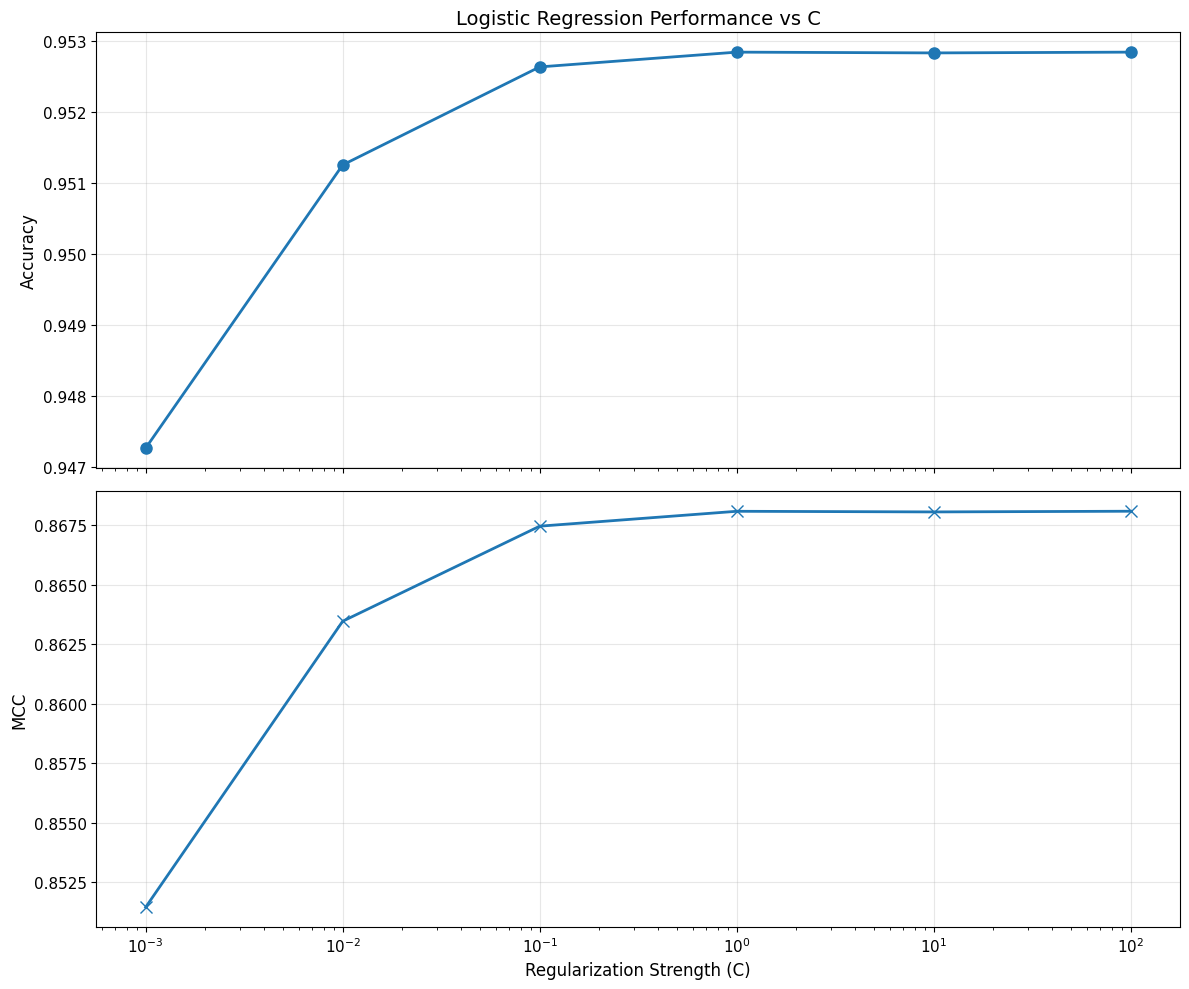

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Accuracy
axes[0].plot(C_list, mean_acc_lr, marker='o', linewidth=2, markersize=8)
axes[0].set_xscale('log')
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].set_title("Logistic Regression Performance vs C", fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=11)

# MCC
axes[1].plot(C_list, mean_mcc_lr, marker='x', linewidth=2, markersize=8)
axes[1].set_xscale('log')
axes[1].set_xlabel("Regularization Strength (C)", fontsize=12)
axes[1].set_ylabel("MCC", fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='both', labelsize=11)

# Set X-ticks agar sesuai angka
plt.xticks(C_list)

plt.tight_layout()
plt.show()

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

# Hyperparameter MLP
hidden_layer_sizes_list = [4, 8, 16, 32, 64, 100]

mean_acc_mlp = []
mean_mcc_mlp = []
train_time_all = []
predict_time_all = []
fold_counter = 1

# Repeated CV
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("      MLP CLASSIFIER EVALUATION")
print("===============================\n")

for h in hidden_layer_sizes_list:

    print("\n\n======================")
    print(f"  Hidden Layer = {h}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    # Cross Validation
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # MLP model
        model = MLPClassifier(
            hidden_layer_sizes=(h,),
            activation='relu',
            solver='adam',
            max_iter=2000,
            random_state=42
        )

        # Train time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Predict time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        model.fit(X_train_scaled, y_train_fold)
        y_pred = model.predict(X_test_scaled)

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_mlp.append(np.mean(acc_all))
    mean_mcc_mlp.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for Hidden Layer =", hidden_layer_sizes_list)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


      MLP CLASSIFIER EVALUATION



  Hidden Layer = 4

===== Fold 1 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95067
MCC: 0.86250
Training Time:  1.29718 sec
Prediksi Time:  0.00164 sec

===== Fold 2 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.94327
MCC: 0.84121
Training Time:  2.63392 sec
Prediksi Time:  0.00165 sec

===== Fold 3 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95177
MCC: 0.86538
Training Time:  2.56945 sec
Prediksi Time:  0.00156 sec

===== Fold 4 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.95725
MCC: 0.87994
Training Time:  1.73247 sec
Prediksi Time:  0.00159 sec

===== Fold 5 ====
Selected features: ['lloc', 'sloc'

**Visualitation of Evaluation Result of hidden_layer**

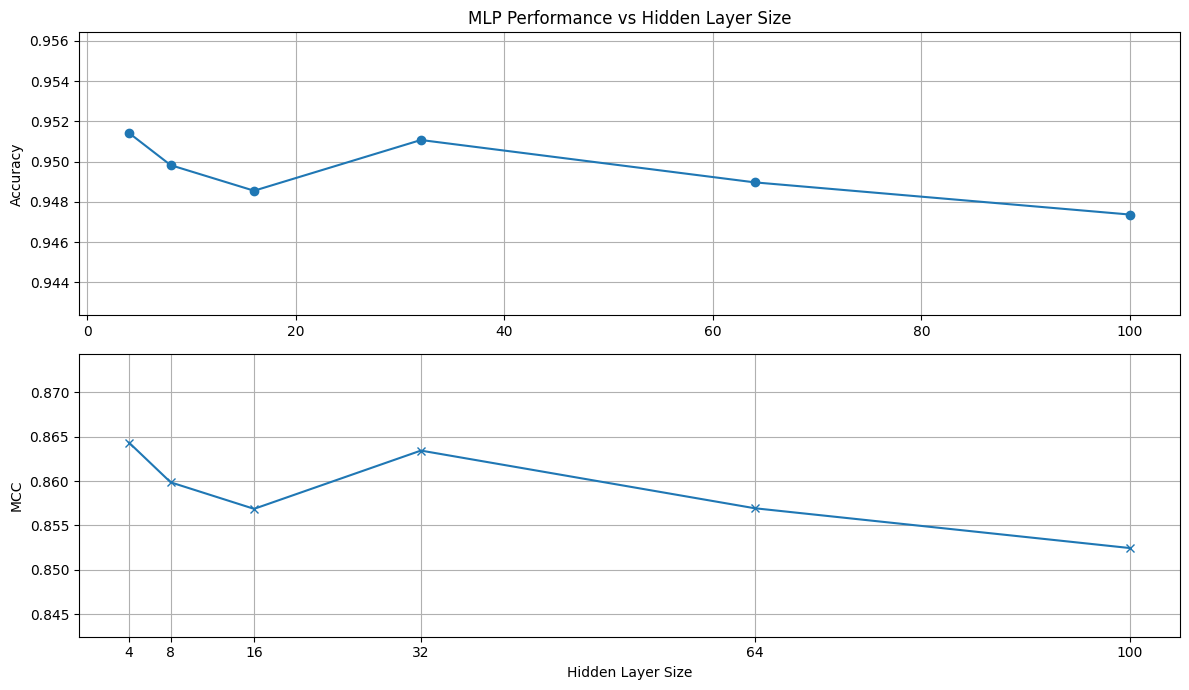

In [ ]:
plt.figure(figsize=(12, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(hidden_layer_sizes_list, mean_acc_mlp, marker='o')
plt.title("MLP Performance vs Hidden Layer Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_mlp) - 0.005, max(mean_acc_mlp) + 0.005)

# Plot MCC
plt.subplot(2, 1, 2)
plt.plot(hidden_layer_sizes_list, mean_mcc_mlp, marker='x')
plt.xlabel("Hidden Layer Size")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_mlp) - 0.01, max(mean_mcc_mlp) + 0.01)

plt.xticks(hidden_layer_sizes_list)

plt.tight_layout()
plt.show()

**TabNet**

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00


In [ ]:
import time
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np
import torch
import pandas as pd

# attention and decision hyperparemeter tuning
n_d_a_list = [8, 16, 32, 64]

mean_acc_tabnet = []
mean_mcc_tabnet = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("         TABNET EVALUATION")
print("===============================\n")

for dim in n_d_a_list:

    print(f"\n\n======================\n  n_d = n_a = {dim}\n======================")

    acc_all = []
    mcc_all = []
    train_time_all_fold = []
    predict_time_all_fold = []
    fold_counter = 1

    # Cross Validation of each hyperparemeter tuning range
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx].values
        y_test_fold  = y_train.iloc[test_idx].values

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)

        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        X_train_scaled_tabnet = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
        X_test_scaled_tabnet = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

        # TabNet model
        model = TabNetClassifier(
            n_d=dim,
            n_a=dim,
            n_steps=5,
            gamma=1.3,
            lambda_sparse=1e-4,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=1e-3),
            verbose=0,
            seed=42
        )

        # Train time
        start_train = time.time()
        model.fit(
            X_train_scaled_tabnet, y_train_fold,
            eval_set=[(X_test_scaled_tabnet, y_test_fold)],
            eval_metric=['accuracy'],
            max_epochs=100,
            patience=30
        )
        train_time = time.time() - start_train

        # Predict time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled_tabnet)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all_fold.append(train_time)
        predict_time_all_fold.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_tabnet.append(np.mean(acc_all))
    mean_mcc_tabnet.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all_fold)
    mean_pred = np.mean(predict_time_all_fold)

    print(f"\n>>> RESULT for n_d = n_a = {dim}")
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


         TABNET EVALUATION



  n_d = n_a = 8

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.93341


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.93341
MCC: 0.81081
Training Time:  51.05126 sec
Prediksi Time:  0.09055 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.92628


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.92628
MCC: 0.79086
Training Time:  38.85562 sec
Prediksi Time:  0.09632 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.9282


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.92820
MCC: 0.79741
Training Time:  40.72465 sec
Prediksi Time:  0.09387 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.93889


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.93889
MCC: 0.82853
Training Time:  38.00710 sec
Prediksi Time:  0.09097 sec

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_accuracy = 0.92516


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.92516
MCC: 0.78719
Training Time:  42.01659 sec
Prediksi Time:  0.09161 sec

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_accuracy = 0.92601


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.92601
MCC: 0.79850
Training Time:  36.58602 sec
Prediksi Time:  0.13864 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.92984


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.92984
MCC: 0.80401
Training Time:  38.39624 sec
Prediksi Time:  0.09700 sec

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_accuracy = 0.9282


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.92820
MCC: 0.80328
Training Time:  37.99134 sec
Prediksi Time:  0.10540 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.93121


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'η', 'D', 'η2', 'N', 'N2']
Accuracy: 0.93121
MCC: 0.80816
Training Time:  39.06661 sec
Prediksi Time:  0.09536 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.929


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.92900
MCC: 0.79872
Training Time:  38.53411 sec
Prediksi Time:  0.13671 sec

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_accuracy = 0.92765


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.92765
MCC: 0.79480
Training Time:  39.23754 sec
Prediksi Time:  0.09292 sec

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_accuracy = 0.93012


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.93012
MCC: 0.80645
Training Time:  36.38964 sec
Prediksi Time:  0.09430 sec

Early stopping occurred at epoch 35 with best_epoch = 5 and best_val_0_accuracy = 0.92793


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N2', 'N', 'η2', 'η']
Accuracy: 0.92793
MCC: 0.80211
Training Time:  35.26808 sec
Prediksi Time:  0.10293 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.93149


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.93149
MCC: 0.81031
Training Time:  36.99515 sec
Prediksi Time:  0.10829 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.93037


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.93037
MCC: 0.80199
Training Time:  37.90929 sec
Prediksi Time:  0.09083 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.93478


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.93478
MCC: 0.81651
Training Time:  37.13802 sec
Prediksi Time:  0.10070 sec

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_accuracy = 0.92902


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'η2', 'N']
Accuracy: 0.92902
MCC: 0.80401
Training Time:  36.31265 sec
Prediksi Time:  0.09162 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.92601


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.92601
MCC: 0.78913
Training Time:  38.89185 sec
Prediksi Time:  0.13025 sec

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_accuracy = 0.92793


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.92793
MCC: 0.79951
Training Time:  36.46214 sec
Prediksi Time:  0.09628 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.92599


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.92599
MCC: 0.78987
Training Time:  37.75068 sec
Prediksi Time:  0.09305 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.93971


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η2', 'η', 'N2', 'N']
Accuracy: 0.93971
MCC: 0.83103
Training Time:  37.57051 sec
Prediksi Time:  0.30499 sec

Early stopping occurred at epoch 36 with best_epoch = 6 and best_val_0_accuracy = 0.93012


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93012
MCC: 0.80436
Training Time:  36.67498 sec
Prediksi Time:  0.09275 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.92546


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.92546
MCC: 0.78763
Training Time:  38.87173 sec
Prediksi Time:  0.09203 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.92847


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.92847
MCC: 0.79951
Training Time:  37.61780 sec
Prediksi Time:  0.13547 sec

Early stopping occurred at epoch 37 with best_epoch = 7 and best_val_0_accuracy = 0.92434


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N2', 'η', 'N', 'η2']
Accuracy: 0.92434
MCC: 0.78471
Training Time:  37.39948 sec
Prediksi Time:  0.09047 sec

>>> RESULT for n_d = n_a = 8
Mean Accuracy: 0.92942
Mean MCC: 0.80198
Mean Train Time:    38.46876 sec
Mean Predict Time:  0.11013 sec


  n_d = n_a = 16
Stop training because you reached max_epochs = 100 with best_epoch = 86 and best_val_0_accuracy = 0.95122


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95122
MCC: 0.86299
Training Time:  116.75053 sec
Prediksi Time:  0.12190 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.94903


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.94903
MCC: 0.85626
Training Time:  118.32635 sec
Prediksi Time:  0.10950 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.94629


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.94629
MCC: 0.84844
Training Time:  115.93479 sec
Prediksi Time:  0.11773 sec
Stop training because you reached max_epochs = 100 with best_epoch = 78 and best_val_0_accuracy = 0.95067


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.95067
MCC: 0.86114
Training Time:  115.41562 sec
Prediksi Time:  0.11382 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.95093


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95093
MCC: 0.86178
Training Time:  117.84613 sec
Prediksi Time:  0.15271 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.94683


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.94683
MCC: 0.85015
Training Time:  117.86706 sec
Prediksi Time:  0.11070 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.94875


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.94875
MCC: 0.85546
Training Time:  119.75386 sec
Prediksi Time:  0.10763 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.95095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95095
MCC: 0.86180
Training Time:  119.24440 sec
Prediksi Time:  0.11089 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.94848


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'η', 'D', 'η2', 'N', 'N2']
Accuracy: 0.94848
MCC: 0.85498
Training Time:  116.37739 sec
Prediksi Time:  0.10601 sec
Stop training because you reached max_epochs = 100 with best_epoch = 83 and best_val_0_accuracy = 0.94079


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.94079
MCC: 0.83238
Training Time:  115.21535 sec
Prediksi Time:  0.10794 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.9556


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95560
MCC: 0.87531
Training Time:  115.30516 sec
Prediksi Time:  0.11150 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.95095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95095
MCC: 0.86180
Training Time:  114.74031 sec
Prediksi Time:  0.11551 sec
Stop training because you reached max_epochs = 100 with best_epoch = 84 and best_val_0_accuracy = 0.94355


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N2', 'N', 'η2', 'η']
Accuracy: 0.94355
MCC: 0.84046
Training Time:  114.40150 sec
Prediksi Time:  0.10786 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.95204


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95204
MCC: 0.86495
Training Time:  114.58112 sec
Prediksi Time:  0.15480 sec
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.95038


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95038
MCC: 0.86040
Training Time:  115.37466 sec
Prediksi Time:  0.10866 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.94958


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.94958
MCC: 0.85796
Training Time:  114.30616 sec
Prediksi Time:  0.10520 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.94601


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'η2', 'N']
Accuracy: 0.94601
MCC: 0.84754
Training Time:  115.29136 sec
Prediksi Time:  0.12506 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.9482


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.94820
MCC: 0.85401
Training Time:  114.74390 sec
Prediksi Time:  0.11225 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.94409


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.94409
MCC: 0.84195
Training Time:  115.72592 sec
Prediksi Time:  0.12154 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.94189


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.94189
MCC: 0.83554
Training Time:  116.66862 sec
Prediksi Time:  0.11007 sec
Stop training because you reached max_epochs = 100 with best_epoch = 84 and best_val_0_accuracy = 0.95697


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η2', 'η', 'N2', 'N']
Accuracy: 0.95697
MCC: 0.87953
Training Time:  117.45464 sec
Prediksi Time:  0.12331 sec
Stop training because you reached max_epochs = 100 with best_epoch = 82 and best_val_0_accuracy = 0.9493


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.94930
MCC: 0.85718
Training Time:  119.32840 sec
Prediksi Time:  0.11602 sec

Early stopping occurred at epoch 66 with best_epoch = 36 and best_val_0_accuracy = 0.9345


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.93450
MCC: 0.81402
Training Time:  79.10364 sec
Prediksi Time:  0.16862 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.94848


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.94848
MCC: 0.85466
Training Time:  117.72635 sec
Prediksi Time:  0.10599 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.95038


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N2', 'η', 'N', 'η2']
Accuracy: 0.95038
MCC: 0.86024
Training Time:  117.36142 sec
Prediksi Time:  0.11238 sec

>>> RESULT for n_d = n_a = 16
Mean Accuracy: 0.94823
Mean MCC: 0.85404
Mean Train Time:    114.99379 sec
Mean Predict Time:  0.11830 sec


  n_d = n_a = 32

Early stopping occurred at epoch 87 with best_epoch = 57 and best_val_0_accuracy = 0.95314


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95314
MCC: 0.86825
Training Time:  143.60283 sec
Prediksi Time:  0.21483 sec
Stop training because you reached max_epochs = 100 with best_epoch = 78 and best_val_0_accuracy = 0.94985


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.94985
MCC: 0.85870
Training Time:  165.44930 sec
Prediksi Time:  0.14729 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.95533


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95533
MCC: 0.87455
Training Time:  168.28320 sec
Prediksi Time:  0.15296 sec

Early stopping occurred at epoch 97 with best_epoch = 67 and best_val_0_accuracy = 0.95149


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.95149
MCC: 0.86398
Training Time:  162.25419 sec
Prediksi Time:  0.14905 sec

Early stopping occurred at epoch 76 with best_epoch = 46 and best_val_0_accuracy = 0.95203


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95203
MCC: 0.86517
Training Time:  127.67718 sec
Prediksi Time:  0.22340 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.95697


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95697
MCC: 0.87940
Training Time:  165.25755 sec
Prediksi Time:  0.14891 sec
Stop training because you reached max_epochs = 100 with best_epoch = 86 and best_val_0_accuracy = 0.9567


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.95670
MCC: 0.87837
Training Time:  163.08538 sec
Prediksi Time:  0.21798 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.95451


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95451
MCC: 0.87226
Training Time:  162.75086 sec
Prediksi Time:  0.15114 sec

Early stopping occurred at epoch 96 with best_epoch = 66 and best_val_0_accuracy = 0.95643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'η', 'D', 'η2', 'N', 'N2']
Accuracy: 0.95643
MCC: 0.87757
Training Time:  157.50696 sec
Prediksi Time:  0.15186 sec
Stop training because you reached max_epochs = 100 with best_epoch = 72 and best_val_0_accuracy = 0.95121


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.95121
MCC: 0.86257
Training Time:  161.84752 sec
Prediksi Time:  0.14711 sec

Early stopping occurred at epoch 58 with best_epoch = 28 and best_val_0_accuracy = 0.94492


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.94492
MCC: 0.84534
Training Time:  96.21314 sec
Prediksi Time:  0.14405 sec
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.95506


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95506
MCC: 0.87365
Training Time:  162.04347 sec
Prediksi Time:  0.14725 sec

Early stopping occurred at epoch 73 with best_epoch = 43 and best_val_0_accuracy = 0.94958


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N2', 'N', 'η2', 'η']
Accuracy: 0.94958
MCC: 0.85812
Training Time:  120.54849 sec
Prediksi Time:  0.15440 sec

Early stopping occurred at epoch 78 with best_epoch = 48 and best_val_0_accuracy = 0.95204


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95204
MCC: 0.86495
Training Time:  128.16464 sec
Prediksi Time:  0.21428 sec

Early stopping occurred at epoch 64 with best_epoch = 34 and best_val_0_accuracy = 0.95203


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95203
MCC: 0.86504
Training Time:  104.93785 sec
Prediksi Time:  0.15340 sec

Early stopping occurred at epoch 78 with best_epoch = 48 and best_val_0_accuracy = 0.96136


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.96136
MCC: 0.89184
Training Time:  129.16930 sec
Prediksi Time:  0.14765 sec
Stop training because you reached max_epochs = 100 with best_epoch = 78 and best_val_0_accuracy = 0.95259


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'η2', 'N']
Accuracy: 0.95259
MCC: 0.86655
Training Time:  163.95245 sec
Prediksi Time:  0.15127 sec

Early stopping occurred at epoch 62 with best_epoch = 32 and best_val_0_accuracy = 0.95177


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95177
MCC: 0.86424
Training Time:  104.17177 sec
Prediksi Time:  0.16407 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.95423


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95423
MCC: 0.87127
Training Time:  164.44526 sec
Prediksi Time:  0.14378 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.95066


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95066
MCC: 0.86101
Training Time:  163.87310 sec
Prediksi Time:  0.14931 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.96109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η2', 'η', 'N2', 'N']
Accuracy: 0.96109
MCC: 0.89103
Training Time:  165.49675 sec
Prediksi Time:  0.14603 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.95615


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.95615
MCC: 0.87689
Training Time:  164.04498 sec
Prediksi Time:  0.15596 sec

Early stopping occurred at epoch 62 with best_epoch = 32 and best_val_0_accuracy = 0.9419


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.94190
MCC: 0.83616
Training Time:  102.43414 sec
Prediksi Time:  0.14539 sec
Stop training because you reached max_epochs = 100 with best_epoch = 91 and best_val_0_accuracy = 0.95232


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95232
MCC: 0.86632
Training Time:  162.34785 sec
Prediksi Time:  0.16015 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.95395


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N2', 'η', 'N', 'η2']
Accuracy: 0.95395
MCC: 0.87127
Training Time:  161.77301 sec
Prediksi Time:  0.14378 sec

>>> RESULT for n_d = n_a = 32
Mean Accuracy: 0.95309
Mean MCC: 0.86818
Mean Train Time:    146.85325 sec
Mean Predict Time:  0.16101 sec


  n_d = n_a = 64

Early stopping occurred at epoch 53 with best_epoch = 23 and best_val_0_accuracy = 0.95752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95752
MCC: 0.88089
Training Time:  155.88656 sec
Prediksi Time:  0.29556 sec

Early stopping occurred at epoch 69 with best_epoch = 39 and best_val_0_accuracy = 0.95204


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.95204
MCC: 0.86503
Training Time:  204.20717 sec
Prediksi Time:  0.24476 sec
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.95643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95643
MCC: 0.87771
Training Time:  294.62764 sec
Prediksi Time:  0.22931 sec

Early stopping occurred at epoch 52 with best_epoch = 22 and best_val_0_accuracy = 0.95807


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'η2', 'η', 'D', 'N', 'N2']
Accuracy: 0.95807
MCC: 0.88239
Training Time:  152.20371 sec
Prediksi Time:  0.30062 sec

Early stopping occurred at epoch 66 with best_epoch = 36 and best_val_0_accuracy = 0.95559


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95559
MCC: 0.87523
Training Time:  192.01514 sec
Prediksi Time:  0.23971 sec

Early stopping occurred at epoch 92 with best_epoch = 62 and best_val_0_accuracy = 0.95752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95752
MCC: 0.88081
Training Time:  265.31607 sec
Prediksi Time:  0.22910 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.95725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'η2', 'N', 'N2']
Accuracy: 0.95725
MCC: 0.87999
Training Time:  288.43611 sec
Prediksi Time:  0.46276 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.95889


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95889
MCC: 0.88484
Training Time:  292.63250 sec
Prediksi Time:  0.23749 sec

Early stopping occurred at epoch 51 with best_epoch = 21 and best_val_0_accuracy = 0.95752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'η', 'D', 'η2', 'N', 'N2']
Accuracy: 0.95752
MCC: 0.88075
Training Time:  150.11734 sec
Prediksi Time:  0.23140 sec
Stop training because you reached max_epochs = 100 with best_epoch = 83 and best_val_0_accuracy = 0.95504


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.95504
MCC: 0.87368
Training Time:  287.63627 sec
Prediksi Time:  0.22799 sec

Early stopping occurred at epoch 90 with best_epoch = 60 and best_val_0_accuracy = 0.95807


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95807
MCC: 0.88252
Training Time:  258.92178 sec
Prediksi Time:  0.23007 sec
Stop training because you reached max_epochs = 100 with best_epoch = 75 and best_val_0_accuracy = 0.95917


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95917
MCC: 0.88542
Training Time:  285.51617 sec
Prediksi Time:  0.22983 sec
Stop training because you reached max_epochs = 100 with best_epoch = 70 and best_val_0_accuracy = 0.95533


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'N2', 'N', 'η2', 'η']
Accuracy: 0.95533
MCC: 0.87444
Training Time:  285.23740 sec
Prediksi Time:  0.22886 sec
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.95725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.95725
MCC: 0.87999
Training Time:  287.12981 sec
Prediksi Time:  0.22649 sec

Early stopping occurred at epoch 53 with best_epoch = 23 and best_val_0_accuracy = 0.95559


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95559
MCC: 0.87524
Training Time:  154.95869 sec
Prediksi Time:  0.24166 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.96383


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.96383
MCC: 0.89888
Training Time:  286.21639 sec
Prediksi Time:  0.23231 sec
Stop training because you reached max_epochs = 100 with best_epoch = 81 and best_val_0_accuracy = 0.95807


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N2', 'η2', 'N']
Accuracy: 0.95807
MCC: 0.88247
Training Time:  288.17435 sec
Prediksi Time:  0.24133 sec

Early stopping occurred at epoch 85 with best_epoch = 55 and best_val_0_accuracy = 0.95478


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95478
MCC: 0.87290
Training Time:  247.49401 sec
Prediksi Time:  0.23209 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'E', 'T', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'N2', 'η2']
Accuracy: 0.95095
MCC: 0.86232
Training Time:  124.99617 sec
Prediksi Time:  0.32758 sec

Early stopping occurred at epoch 64 with best_epoch = 34 and best_val_0_accuracy = 0.95258


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N2', 'N', 'η2']
Accuracy: 0.95258
MCC: 0.86668
Training Time:  187.73210 sec
Prediksi Time:  0.22829 sec

Early stopping occurred at epoch 52 with best_epoch = 22 and best_val_0_accuracy = 0.95862


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'E', 'T', 'V', 'B', 'N_hat', 'D', 'η2', 'η', 'N2', 'N']
Accuracy: 0.95862
MCC: 0.88401
Training Time:  153.34583 sec
Prediksi Time:  0.23277 sec

Early stopping occurred at epoch 82 with best_epoch = 52 and best_val_0_accuracy = 0.95807


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['lloc', 'sloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.95807
MCC: 0.88236
Training Time:  239.43528 sec
Prediksi Time:  0.22915 sec

Early stopping occurred at epoch 82 with best_epoch = 52 and best_val_0_accuracy = 0.94793


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.94793
MCC: 0.85310
Training Time:  239.62233 sec
Prediksi Time:  0.22835 sec

Early stopping occurred at epoch 53 with best_epoch = 23 and best_val_0_accuracy = 0.95533


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['sloc', 'lloc', 'blank', 'wmc', 'cyclo', 'T', 'E', 'V', 'B', 'N_hat', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95533
MCC: 0.87445
Training Time:  156.05794 sec
Prediksi Time:  0.22919 sec

Early stopping occurred at epoch 90 with best_epoch = 60 and best_val_0_accuracy = 0.95751


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['sloc', 'lloc', 'blank', 'cyclo', 'wmc', 'T', 'E', 'B', 'V', 'N_hat', 'D', 'N2', 'η', 'N', 'η2']
Accuracy: 0.95751
MCC: 0.88105
Training Time:  273.89299 sec
Prediksi Time:  0.24316 sec

>>> RESULT for n_d = n_a = 64
Mean Accuracy: 0.95636
Mean MCC: 0.87749
Mean Train Time:    230.07239 sec
Mean Predict Time:  0.25119 sec


**Visualitation of Evaluation Result of attention and decision**

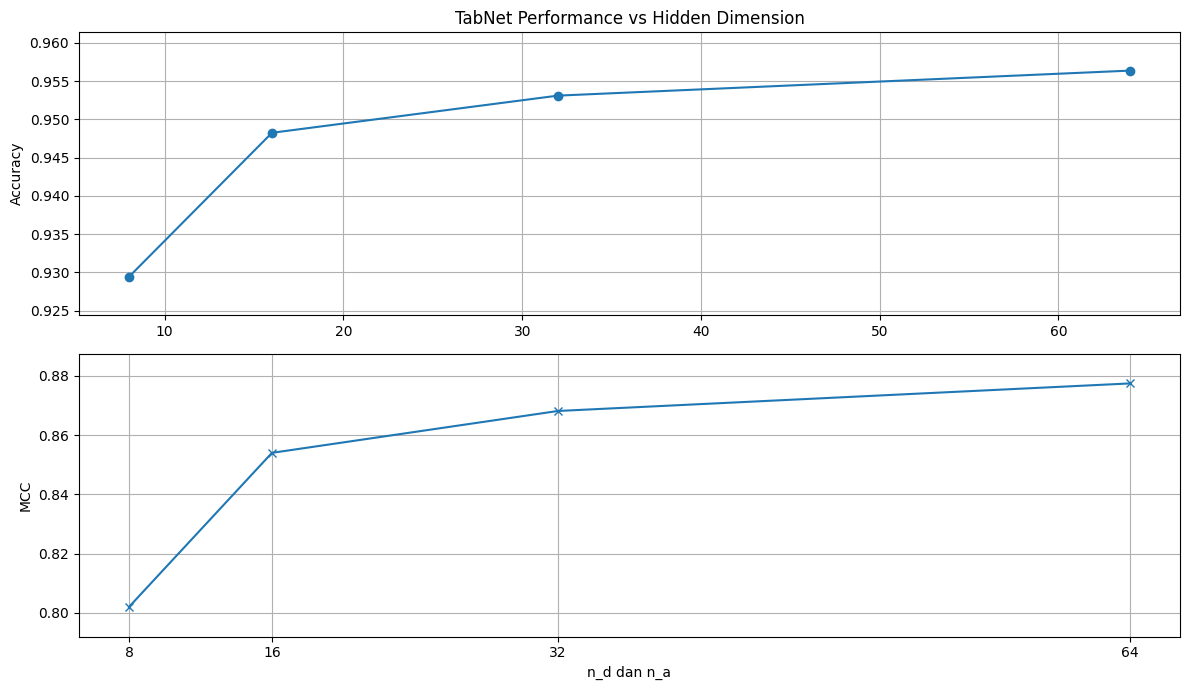

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(n_d_a_list, mean_acc_tabnet, marker='o')
plt.title("TabNet Performance vs Hidden Dimension")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_tabnet) - 0.005, max(mean_acc_tabnet) + 0.005)

# Plot MCC
plt.subplot(2, 1, 2)
plt.plot(n_d_a_list, mean_mcc_tabnet, marker='x')
plt.xlabel("n_d dan n_a")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_tabnet) - 0.01, max(mean_mcc_tabnet) + 0.01)

# Set X-ticks agar sesuai angka
plt.xticks(n_d_a_list)

plt.tight_layout()
plt.show()